# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

In [2]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


# Test set Image Processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/My Drive/PlantDiseases/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 7897 files belonging to 17 classes.
['Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


# Loading Model

In [9]:
cnn = tf.keras.models.load_model('/content/drive/My Drive/PlantDiseases/trained_plant_disease_model.h5')

#Visualising and Performing Prediction on Single image

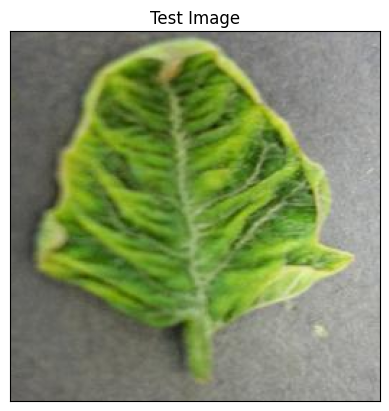

In [10]:
#Test Image Visualization
import cv2
image_path = '/content/drive/My Drive/PlantDiseases/test/TomatoYellowCurlVirus6.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [11]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 242ms/step


In [ ]:
print(predictions)

[[1.89378741e-04 3.94694069e-07 3.40932274e-05 3.33116419e-04
  5.84930831e-06 5.97163962e-05 9.56107229e-02 6.22819271e-03
  2.76370411e-05 3.84543782e-05 8.81515682e-01 1.51409255e-02
  1.13988186e-04 6.90349436e-04 1.95631151e-06 1.30209060e-07
  9.39042093e-06]]


In [12]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

14


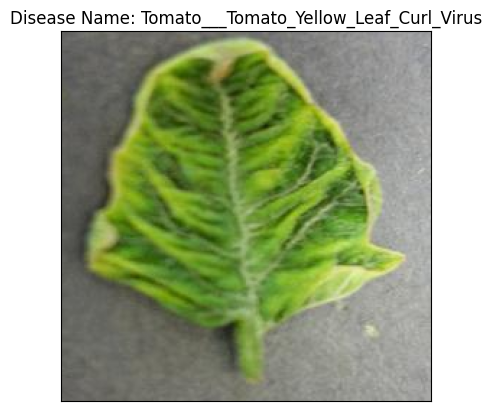

In [13]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
print(tf.__version__)
# print(plt.__version__)
# print(ImageDataGenerator.__version__)
print(np.__version__)

2.15.0
1.25.2


In [ ]:
# pip install numpy==1.25.2